In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

2024-07-22 23:12:09.763106: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 23:12:09.768384: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 23:12:09.781556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 23:12:09.800776: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 23:12:09.806190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 23:12:09.820572: I tensorflow/core/platform/cpu_feature_gu

Load the Data

In [6]:
data = pd.read_csv('./planets.csv')

Afficher le spremières lignes pour vérifier

In [ ]:
print(data.head())

Vérifier les informations sur le dataset

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Planet                         4 non-null      object 
 1   Color                          4 non-null      object 
 2   Mass (10^24kg)                 4 non-null      float64
 3   Diameter (km)                  4 non-null      int64  
 4   Density (kg/m^3)               4 non-null      int64  
 5   Surface Gravity(m/s^2)         4 non-null      float64
 6   Escape Velocity (km/s)         4 non-null      float64
 7   Rotation Period (hours)        4 non-null      float64
 8   Length of Day (hours)          4 non-null      float64
 9   Distance from Sun (10^6 km)    4 non-null      float64
 10  Perihelion (10^6 km)           4 non-null      float64
 11  Aphelion (10^6 km)             4 non-null      float64
 12  Orbital Period (days)          4 non-null      float64
 13 

Gérer les valeurs manquantes si nécessaire

In [14]:
data = data.dropna()

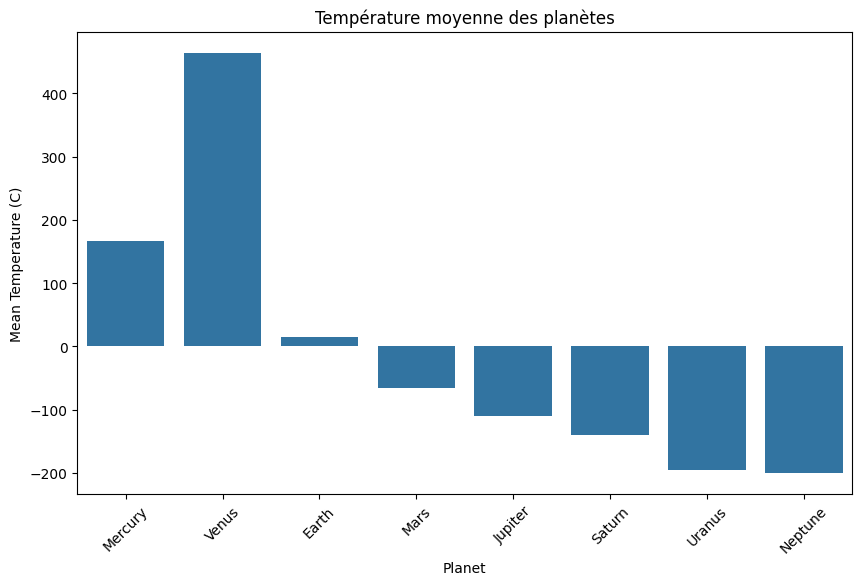

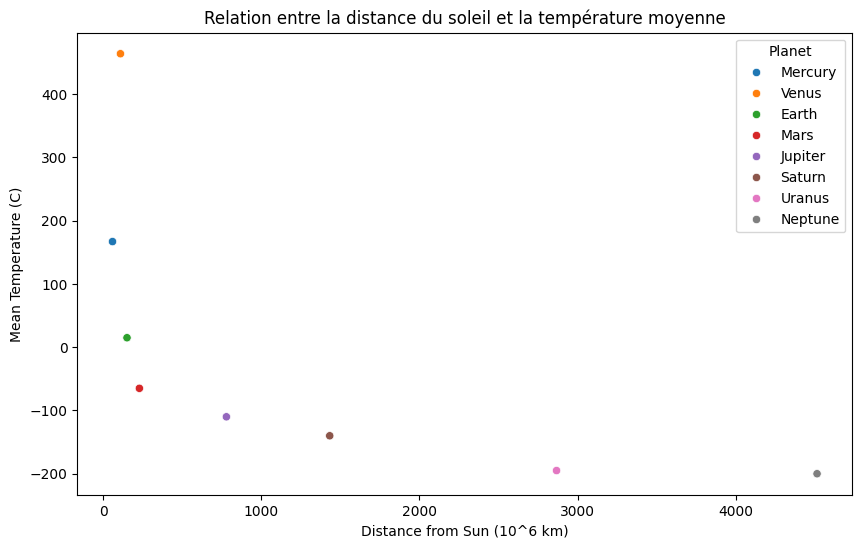

In [8]:
# Convertir les colonnes object en numériques si possible
data['Orbital Period (days)'] = pd.to_numeric(data['Orbital Period (days)'], errors='coerce')
data['Surface Pressure (bars)'] = pd.to_numeric(data['Surface Pressure (bars)'], errors='coerce')
data['Number of Moons'] = pd.to_numeric(data['Number of Moons'], errors='coerce')

# Sélectionner les colonnes numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Comparaison des températures moyennes
plt.figure(figsize=(10, 6))
sns.barplot(x='Planet', y='Mean Temperature (C)', data=data)
plt.title('Température moyenne des planètes')
plt.xticks(rotation=45)
plt.show()

# Relation entre la distance du soleil et la température moyenne
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance from Sun (10^6 km)', y='Mean Temperature (C)', data=data, hue='Planet')
plt.title('Relation entre la distance du soleil et la température moyenne')
plt.show()


# Sélectionner les colonnes pertinentes

In [9]:
X = data[['Distance from Sun (10^6 km)']].values
y = data['Mean Temperature (C)'].values



# Diviser les données en ensembles d'entraînement et de test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train}, X_test: {X_test} y_train: {y_train} y_test: {y_test}")

X_train: [[  57.9]
 [4515. ]
 [ 149.6]
 [ 778.5]
 [ 228. ]
 [2867. ]], X_test: [[ 108.2]
 [1432. ]] y_train: [ 167 -200   15 -110  -65 -195] y_test: [ 464 -140]


# Créer et entraîner le modèle

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Faire des prédictions et évaluer le modèle 

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")

Erreur quadratique moyenne : 104561.85828613864
Coefficient de détermination (R²) : -0.14646132062342265


# Visualiser les résultats

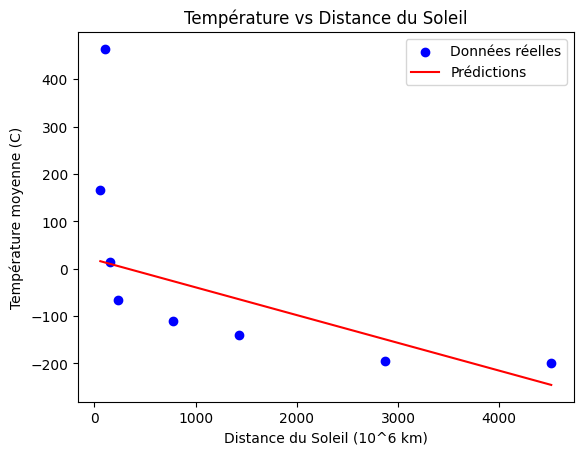

In [22]:
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, model.predict(X), color='red', label='Prédictions')
plt.xlabel('Distance du Soleil (10^6 km)')
plt.ylabel('Température moyenne (C)')
plt.title('Température vs Distance du Soleil')
plt.legend()
plt.show()